### Reading Data and Analysis of Rounds2 data.

In [1]:

# importing pandas package 
import pandas as pd 
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2.shape
rounds2.info()
print(rounds2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
                                        company_permalink  \
0                                     /organization/-fame   
1                                  /ORGANIZATION/-QOUNTER   
2                                  /organization/-qounter   
3                     /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /ORGANIZATION/ZZZZA

In [2]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(rounds2)


                                        company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/ãeron   
114947                             /organization/ãasys-2   
114948  /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1       /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2       /funding-round/b44fbb9415

In [3]:
rounds2 = pd.DataFrame(rounds2)
rounds2 = rounds2.drop_duplicates(subset='company_permalink',inplace=False)
print(rounds2.shape)

(66370, 6)


Thus number of unique companies in rounds table are 66370.

In [4]:
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
# summing up the missing values (column-wise)
print(rounds2.company_permalink.count)
#rounds2.isnull().sum()
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

<bound method Series.count of 0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ãasys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object>


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

* Funding_round_code column has around 72.91%  missing values,thus it is impossible to either impute or delete these values. So it's better to drop this column.
* No Row has all the values missing.

In [5]:
# removing the Funding_round_code columns
rounds2 = rounds2.drop('funding_round_code', axis=1)
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

We now have columns having maximum 17.39% missing values (Landsize). Next, we need to treat the rows.

### Treating Missing Values in Rows

In [6]:
# sum it up to check how many rows have all missing values
rounds2.isnull().all(axis=1).sum()

0

In [7]:
# Percentage of more than 1 values missing in any row.
100*(len(rounds2[rounds2.isnull().sum(axis=1) > 1].index) / len(rounds2.index)) # gives null rows 
#round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

0.0

In [8]:
rounds2[rounds2.isnull().sum(axis=1) > 0]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,05-02-2013,NaN
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,21-04-2013,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,22-01-2014,NaN
...,...,...,...,...,...
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,12-12-2012,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,19-08-2015,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,01-01-2007,NaN
114927,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,26-07-2013,NaN


In [9]:
100*(len(rounds2[rounds2.isnull().sum(axis=1) > 0].index) / len(rounds2.index))

17.390320924931927

Thus total 19990 i.e 17.3 % rows have of one missing value in raised_amount_used column.

In [10]:
rounds2['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

50% percentile is almost 10  folds less than mean. Also ,there's a significant variation in the 25th and the 75th percentile.

Thus, imputing this with mean/median seems quite biased, and so we should remove the NaNs.



In [11]:
import numpy as np
rounds2 = rounds2[~np.isnan(rounds2['raised_amount_usd'])]

In [12]:
100*(len(rounds2[rounds2.isnull().sum(axis=1) > 0].index) / len(rounds2.index))

0.0

In [13]:
#print(rounds2.tail())

-----------------------------------------------------------------------

### Reading Data and Analysis of Companies data.


In [14]:
import numpy as np
import pandas as pd

companies= pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
# The number of rows and columns in company database:
print('The number of rows and columns')
companies.shape
companies.info()
print(companies.head())
#print(companies.tail())


The number of rows and columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage

Now we will be deleting Duplicates.

In [15]:
companies['permalink'] = companies['permalink'].str.lower()
companies = companies.drop_duplicates(subset='permalink',inplace=False)
print(companies.shape)

(66368, 10)


In [16]:
#companies = pd.DataFrame(companies)
companies= pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
companies['permalink'] = companies['permalink'].str.lower()
print(companies.shape)

(66368, 10)


Thus number of unique company values in campany table is 2 less than that of rounds2 data.

### Treating Missing Values:

In [17]:
# summing up the missing values (column-wise)
print(companies.shape)
#rounds2.isnull().sum()
round(100*(companies.isnull().sum()/len(companies.index)), 2)

(66368, 10)


permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

Hence no column has more than 23% missing values. So now we'll analyse missing values of rows.

In [18]:
# sum it up to check how many rows have all missing values
companies.isnull().all(axis=1).sum()

0

In [19]:
# Percentage of more than 5 values missing in any row.
100*(len(companies[companies.isnull().sum(axis=1) > 7].index) / len(companies.index)) # gives null rows 


0.0

In [20]:
100*(len(companies[companies.isnull().sum(axis=1) > 4].index) / len(companies.index)) # gives null rows 

6.023987463837995

Hence 6% rows have 5 or more than 5 values missing. So, these rows can be dropped.

In [21]:
companies = companies[companies.isnull().sum(axis=1) <= 4]

In [22]:
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink         0.00
name              0.00
homepage_url      5.80
category_list     2.54
status            0.00
country_code      4.82
state_code        7.29
region            6.46
city              6.46
founded_at       19.12
dtype: float64

In [23]:
companies['founded_at'].describe()
#companies['founded_at'].nunique()

count          50442
unique          3943
top       01-01-2012
freq            2709
Name: founded_at, dtype: object

Date can be computed with top date as frequency of top date is very high and number of unique dates are also very less.

In [24]:
companies.loc[pd.isnull(companies['founded_at']), ['founded_at']] =  '01-01-2012'

In [25]:
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.00
name             0.00
homepage_url     5.80
category_list    2.54
status           0.00
country_code     4.82
state_code       7.29
region           6.46
city             6.46
founded_at       0.00
dtype: float64

As country code is missing in some rows and it is important factor to determine english speaking country, we can drop these missing rows.

In [26]:
companies = companies[pd.notnull(companies['country_code'])]
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.00
name             0.00
homepage_url     6.09
category_list    2.67
status           0.00
country_code     0.00
state_code       2.60
region           1.73
city             1.73
founded_at       0.00
dtype: float64

In [27]:
companies = companies[pd.notnull(companies['category_list'])]
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.00
name             0.00
homepage_url     5.73
category_list    0.00
status           0.00
country_code     0.00
state_code       2.62
region           1.76
city             1.75
founded_at       0.00
dtype: float64

In [28]:
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.00
name             0.00
homepage_url     5.73
category_list    0.00
status           0.00
country_code     0.00
state_code       2.62
region           1.76
city             1.75
founded_at       0.00
dtype: float64

homepage url should not be same for two companies. So it's better to drop this column as permalink which is unique for any company is not repetitive.

In [29]:
companies = companies[pd.notnull(companies['homepage_url'])]
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.00
name             0.00
homepage_url     0.00
category_list    0.00
status           0.00
country_code     0.00
state_code       2.67
region           1.79
city             1.78
founded_at       0.00
dtype: float64

In [30]:
companies['state_code'].describe()

count     53012
unique      307
top          CA
freq      11978
Name: state_code, dtype: object

In [31]:
companies[pd.isnull(companies['city'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,operating,CHN,NaN,NaN,NaN,01-01-2012
96,/organization/1d4-pty,1d4 Pty,http://www.immortaloutdoors.com,Geospatial|Maps|Outdoors,operating,NOR,2,NaN,NaN,01-01-2012
163,/organization/24tidy,24tidy,http://24tidy.com,Services,operating,CHN,NaN,NaN,NaN,01-01-2012
174,/organization/2c2p,2C2P,http://www.2c2p.com,E-Commerce|Mobile Commerce|Payments|Software,operating,SGP,NaN,NaN,NaN,01-01-2003
228,/organization/360shop,360SHOP,http://www.360shop.com.cn,Enterprise Software,operating,CHN,NaN,NaN,NaN,01-01-2012
...,...,...,...,...,...,...,...,...,...,...
65941,/organization/zhijiang-jonway-automobile,Zhijiang Jonway Automobile,http://www.jonwayauto.com,Automotive,acquired,CHN,2,NaN,NaN,01-01-2012
65944,/organization/zhitu,Zhitu,http://www.imzhitu.com,Photography,operating,CHN,NaN,NaN,NaN,01-01-2012
65957,/organization/zhui-xin,Zhui Xin,http://zhui.cn,Software,operating,CHN,NaN,NaN,NaN,01-01-2012
66264,/organization/zubka,Zubka,http://www.zubka.com,Consulting,closed,GBR,B9,NaN,NaN,01-01-2006


As we can see in above results, Mostly cities are null for null regions. So let's drop them as well.

In [32]:
companies = companies[pd.notnull(companies['region'])]
companies = companies[pd.notnull(companies['state_code'])]
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.0
name             0.0
homepage_url     0.0
category_list    0.0
status           0.0
country_code     0.0
state_code       0.0
region           0.0
city             0.0
founded_at       0.0
dtype: float64

In [33]:
companies[pd.isnull(companies['city'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [34]:
companies['country_code'] = companies['country_code'].astype('category')

# displaying frequencies of each category
#companies['country_code'].value_counts()

In [35]:

print(companies['permalink'])
print(companies.permalink.nunique())

0                                      /organization/-fame
1                                   /organization/-qounter
3                                    /organization/0-6-com
4                           /organization/004-technologies
6                      /organization/0ndine-biomedical-inc
                               ...                        
66361                             /organization/zytoprotec
66362                                  /organization/zzish
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66366                               /organization/ãasys-2
Name: permalink, Length: 52740, dtype: object
52740


### Merging Rounds and companies data frame.

As per TA's explanation and my observation,we should not delete duplicates from both the tables and consider all the values from both the tables(rounds2 and companies) except missing values  as there are multiple entries of  same company which has received funds by different funding types in rounds2. If we consider only unique permalink then we might loose few funding types entries for same company.An outer join of A and B gives the results of A union B, i.e. the outer parts of a Venn diagram union.So we'll use outer join to avoid missing any company value.

In [36]:
master_frame=pd.merge(companies, rounds2, how = "outer", left_on = "permalink", right_on = "company_permalink")

print(master_frame)

                                  permalink                    name  \
0                       /organization/-fame                   #fame   
1                    /organization/-qounter                :Qounter   
2                     /organization/0-6-com                 0-6.com   
3            /organization/004-technologies        004 Technologies   
4       /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
...                                     ...                     ...   
102837                                  NaN                     NaN   
102838                                  NaN                     NaN   
102839                                  NaN                     NaN   
102840                                  NaN                     NaN   
102841                                  NaN                     NaN   

                             homepage_url  \
0                      http://livfame.com   
1                  http://www.qounter.com   
2           

### Cleaning Data of  master_frame:

In [37]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  11.35
name                       11.36
homepage_url               11.35
category_list              11.35
status                     11.35
country_code               11.35
state_code                 11.35
region                     11.35
city                       11.35
founded_at                 11.35
company_permalink           7.67
funding_round_permalink     7.67
funding_round_type          7.67
funded_at                   7.67
raised_amount_usd           7.67
dtype: float64

funding_round_code column has to removed as number of missing values are really huge.raised_amount_usd column and permalink columns also need to be deleted as these are important column and imputation is not possible.

In [38]:
import numpy as np
import pandas as pd
master_frame = master_frame[pd.notnull(master_frame['permalink'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
founded_at                 0.00
company_permalink          8.65
funding_round_permalink    8.65
funding_round_type         8.65
funded_at                  8.65
raised_amount_usd          8.65
dtype: float64

In [39]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
founded_at                 0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

### Average funding amount of venture type:

In [40]:
category_by_funding_type = master_frame.groupby('funding_round_type')

In [41]:
category_by_funding_type['raised_amount_usd'].mean()

funding_round_type
angel                    9.752029e+05
convertible_note         1.379895e+06
debt_financing           1.664649e+07
equity_crowdfunding      5.453219e+05
grant                    4.601210e+06
non_equity_assistance    5.014948e+05
post_ipo_debt            1.704481e+08
post_ipo_equity          6.316833e+07
private_equity           7.116546e+07
product_crowdfunding     1.361448e+06
secondary_market         8.443853e+07
seed                     7.452639e+05
undisclosed              1.376043e+07
venture                  1.171285e+07
Name: raised_amount_usd, dtype: float64

In [42]:
master_frame = master_frame[master_frame['funding_round_type'].isin([ 'angel', 'seed','venture', 'private_equity'])]
category_by_funding_type = master_frame.groupby('funding_round_type')
category_by_funding_type['raised_amount_usd'].mean()

master_frame1 = master_frame[master_frame['funding_round_type'].isin([ 'angel', 'seed','venture', 'private_equity'])]
category_by_funding_type1 = master_frame1.groupby('funding_round_type')
category_by_funding_type1['raised_amount_usd'].mean()

funding_round_type
angel             9.752029e+05
private_equity    7.116546e+07
seed              7.452639e+05
venture           1.171285e+07
Name: raised_amount_usd, dtype: float64

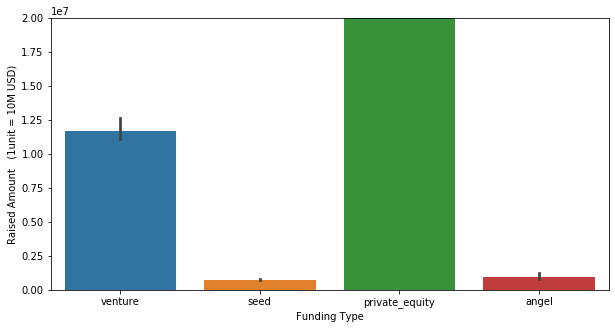

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame1)
g.set_ylim(0, 20000000)
g.set(xlabel='Funding Type', ylabel='Raised Amount   (1unit = 10M USD)')
plt.show()

As angel and seed total investment sums to (975202.94+745263.88)=1720466.82,which is more than 17 million,so venture is the only sector which is possible to invest under the range of 15 million.

In [44]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture'])]
category_by_funding_type = master_frame.groupby('funding_round_type')
category_by_funding_type['raised_amount_usd'].mean()

funding_round_type
venture    1.171285e+07
Name: raised_amount_usd, dtype: float64

## Checkpoint 3: Country Analysis

In [45]:
master_frame.sort_values(by='raised_amount_usd',ascending=False).head(9)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
30105,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21-10-2006,1.760000e+10
82575,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009,/organization/uber,/funding-round/1fa1e079dd45f9d615ce1469ed9090fb,venture,04-12-2014,1.200000e+09
82582,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009,/organization/uber,/funding-round/7a617d3521e9a71816c8d5cbcd4c49b0,venture,06-06-2014,1.200000e+09
88963,/organization/xiaomi,Xiaomi,http://www.mi.com,Consumer Electronics|Mobile,operating,CHN,22,Beijing,Beijing,04-04-2010,/organization/xiaomi,/funding-round/0022fc712b8a48fc6b7341c6aa3b42a5,venture,22-12-2014,1.100000e+09
82578,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009,/organization/uber,/funding-round/2fd6f840728c42adee151fc1f1bf218e,venture,18-02-2015,1.000000e+09
82585,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009,/organization/uber,/funding-round/c738765257ab10e721f1a02d5af54681,venture,31-07-2015,1.000000e+09
72794,/organization/social-finance,SoFi,http://www.sofi.com,Education|Finance|Financial Services|Peer-to-Peer,operating,USA,CA,SF Bay Area,San Francisco,01-04-2011,/organization/social-finance,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,30-09-2015,1.000000e+09
29182,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,operating,IND,19,Bangalore,Bangalore,01-09-2007,/organization/flipkart,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,29-07-2014,1.000000e+09
73906,/organization/space-exploration-technologies,Space Exploration Technologies,http://www.spacex.com,Aerospace|Space Travel,operating,USA,CA,Los Angeles,Hawthorne,01-01-2002,/organization/space-exploration-technologies,/funding-round/3cbfa3a38fe9a74b04f6eaae8b5bc478,venture,20-01-2015,1.000000e+09


So,filtering out top 9 highly invested countries are as shown below:

In [46]:

master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9)

country_code
USA    3.978218e+11
CHN    3.562355e+10
GBR    1.863205e+10
IND    1.383492e+10
CAN    8.895475e+09
FRA    6.666626e+09
ISR    6.367861e+09
DEU    6.088517e+09
JPN    3.011058e+09
Name: raised_amount_usd, dtype: float64

In [47]:
top9=master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9_fig=master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [48]:
print(top9.shape)

(41706, 15)


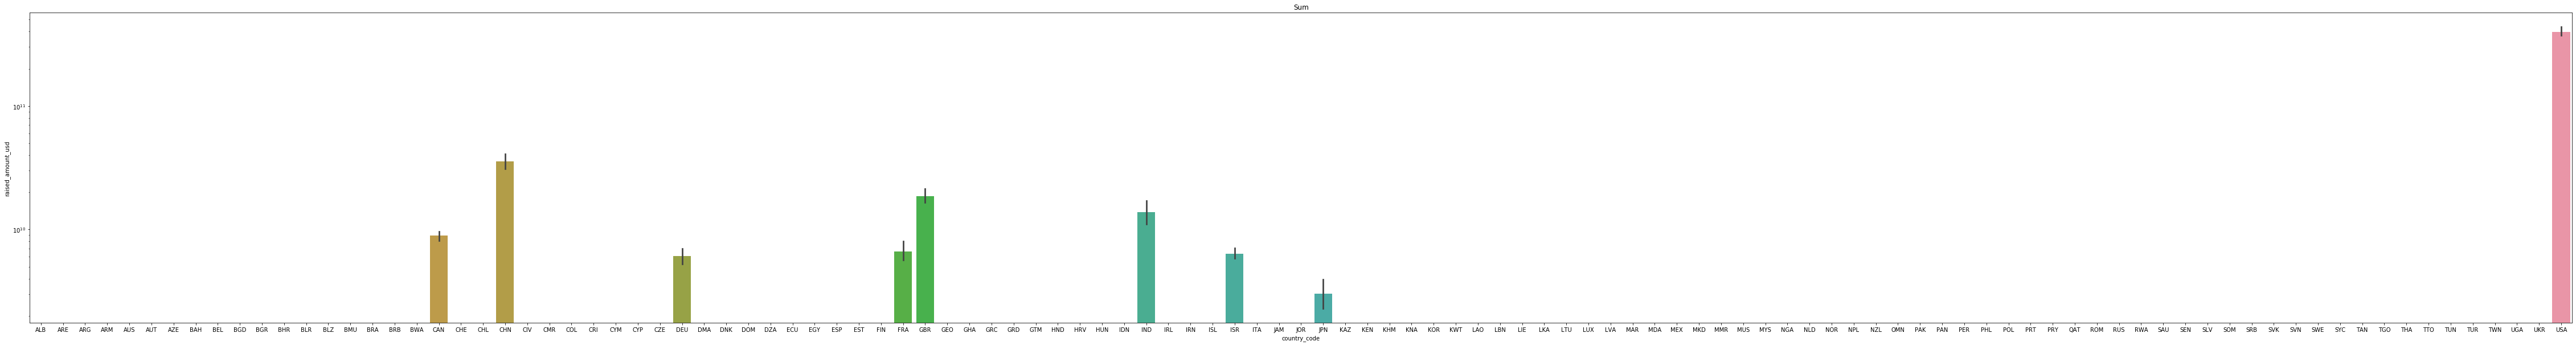

In [140]:

import matplotlib.pyplot as plt
import seaborn as sns
# Plotting sum across top 9 country_code 

plt.figure(figsize=(80, 10))

b=sns.barplot(x="country_code", y="raised_amount_usd", data=top9_fig, estimator=sum)
b.set_yscale('log')
plt.title("Sum")
plt.show()

As Spark Fund only wants to invest in English-speaking countries because of the ease of communication. Now we'll Identify the top three English-speaking countries in the data frame top9 using web Scraping.

In [50]:
import requests, bs4

# getting HTML from the WikiLink
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
req = requests.get(url)

# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
#soup = bs4.BeautifulSoup(req.text, "html5lib")
soup2=bs4.BeautifulSoup(req.text,"html5lib")
#print(soup2.select('tbody'))

In [51]:
soup2.select('#Non-sovereign_entities')

[<span class="mw-headline" id="Non-sovereign_entities">Non-sovereign entities</span>]

In [52]:
eng_speaking_countries= pd.DataFrame({'country_code': ['USA', 'GBR', 'IND']}) 
print(eng_speaking_countries)

  country_code
0          USA
1          GBR
2          IND


## Checkpoint 4: Sector Analysis 1

In [53]:
round(100*(top9.isnull().sum()/len(top9.index)),2)

permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
founded_at                 0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [54]:
mapping=pd.read_csv("mapping.csv",encoding='ISO-8859-1')

In [55]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [56]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

Removing Blank Column first of all as there are only 8 sectors.

In [57]:
mapping=mapping.drop('Blanks',axis=1)

In [58]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [59]:
round((mapping.isnull().sum()/len(mapping.index))*100,2)

category_list                              0.15
Automotive & Sports                        0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

In [60]:
mapping=mapping[~mapping.category_list.isnull()]
round((mapping.isnull().sum()/len(mapping.index))*100,2)

category_list                              0.0
Automotive & Sports                        0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [61]:
mapping.shape

(687, 9)

In [62]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [63]:
top9.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

Now we'll replace '0' in category list with 'na'

In [64]:
mapping['category_list']=mapping['category_list'].str.lower()
top9['category_list']=top9['category_list'].str.lower()

C:\Users\bhart\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


In [66]:
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [67]:
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


To fetch primary sector value from top3_engl data table:

In [68]:

# function to split category_list values and extract primary sector
def return_primary_sector(ps):
    ps = ps.split('|')
    if len(ps) > 1:
        return ps[0]
    else:
        return ps

In [69]:
top3_engl = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_engl.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(top3_engl)

                        permalink          name                homepage_url  \
0             /organization/-fame         #fame          http://livfame.com   
7            /organization/0xdata        H2O.ai              http://h2o.ai/   
8            /organization/0xdata        H2O.ai              http://h2o.ai/   
9            /organization/0xdata        H2O.ai              http://h2o.ai/   
17     /organization/1-mainstream  1 Mainstream  http://www.1mainstream.com   
...                           ...           ...                         ...   
91139    /organization/zyomyx-inc        ZYOMYX       http://www.zyomyx.com   
91141    /organization/zyomyx-inc        ZYOMYX       http://www.zyomyx.com   
91142    /organization/zyomyx-inc        ZYOMYX       http://www.zyomyx.com   
91152         /organization/zyrra         Zyrra        http://www.zyrra.com   
91154        /organization/zystor        Zystor       http://www.zystor.com   

                          category_list     status 

In [70]:
top3_engl['category_list'] = top3_engl['category_list'].apply(lambda x: x.split('|')[0])

C:\Users\bhart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
print(top3_engl['category_list'])

0                media
7            analytics
8            analytics
9            analytics
17                apps
             ...      
91139    biotechnology
91141    biotechnology
91142    biotechnology
91152       e-commerce
91154    biotechnology
Name: category_list, Length: 36871, dtype: object


In [72]:
mapping=pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 


In [73]:
mapping.head()

,category_list,variable,value
0,3d,Manufacturing,1
1,3d printing,Manufacturing,1
2,3d technology,Manufacturing,1
3,accounting,Manufacturing,0
4,active lifestyle,Manufacturing,0


In [74]:
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head(100)


,category_list,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
6,advanced materials,Manufacturing
14,agriculture,Manufacturing
...,...,...
1711,home decor,Cleantech / Semiconductors
1781,lighting,Cleantech / Semiconductors
1805,material science,Cleantech / Semiconductors
1806,mechanical solutions,Cleantech / Semiconductors


In [75]:
mapping.head(100)
top3_engl.head(20)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
17,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
22,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,education,operating,GBR,H9,London,London,01-01-2013,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0
27,/organization/1000memories,1000memories,http://1000memories.com,curated web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0
31,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,curated web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0
32,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,curated web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0
33,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,curated web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0


In [76]:
top3_engl = pd.merge(top3_engl, mapping, how='left', on='category_list')
top3_engl.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
1,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,"News, Search and Messaging"


In [77]:
round(100*(top3_engl.isnull().sum()/len(top3_engl.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
founded_at                 0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
main_sector                0.04
dtype: float64

In [78]:
len(top3_engl[top3_engl.main_sector.isnull()])

13

In [79]:
top3_engl.shape

(36871, 16)

Hence deleting these null main sector values.

In [80]:
top3_engl = top3_engl[~(top3_engl.main_sector.isnull())]
len(top3_engl.index)

36858

### Checkpoint 5: Sector Analysis

Now we have to create 3 DataFrames for Country1,Country2 and Country3.

In [81]:
top3_engl = top3_engl.drop(top3_engl[(top3_engl.raised_amount_usd < 5000000)].index)
top3_engl = top3_engl.drop(top3_engl[(top3_engl.raised_amount_usd > 15000000)].index)

D1 = top3_engl[top3_engl['country_code'] == 'USA']
D2 = top3_engl[top3_engl['country_code'] == 'GBR']
D3 = top3_engl[top3_engl['country_code'] == 'IND']

 Data frame D1 analysis for country United States of America

In [82]:
print(D1.head())

                          permalink               name  \
3              /organization/0xdata             H2O.ai   
4        /organization/1-mainstream       1 Mainstream   
17     /organization/128-technology     128 Technology   
20  /organization/1366-technologies  1366 Technologies   
21  /organization/1366-technologies  1366 Technologies   

                     homepage_url      category_list     status country_code  \
3                  http://h2o.ai/          analytics  operating          USA   
4      http://www.1mainstream.com               apps   acquired          USA   
17  http://www.128technology.com/  service providers  operating          USA   
20        http://www.1366tech.com      manufacturing  operating          USA   
21        http://www.1366tech.com      manufacturing  operating          USA   

   state_code       region           city  founded_at  \
3          CA  SF Bay Area  Mountain View  01-01-2011   
4          CA  SF Bay Area      Cupertino  01-03-2012   

In [83]:
D1.raised_amount_usd.sum()

102541992937.0

In [84]:
D1.raised_amount_usd.count()

11487

In [85]:
D1.shape

(11487, 16)

In [86]:
D1_by_sector=D1.groupby('main_sector')
print(D1_by_sector.head())

                                permalink                           name  \
3                    /organization/0xdata                         H2O.ai   
4              /organization/1-mainstream                   1 Mainstream   
17           /organization/128-technology                 128 Technology   
20        /organization/1366-technologies              1366 Technologies   
21        /organization/1366-technologies              1366 Technologies   
22        /organization/1366-technologies              1366 Technologies   
23        /organization/1366-technologies              1366 Technologies   
24        /organization/1366-technologies              1366 Technologies   
28              /organization/170-systems                    170 Systems   
30                  /organization/17zuoye                        17zuoye   
31                  /organization/17zuoye                        17zuoye   
34                     /organization/1bog  One Block Off the Grid (1BOG)   
39          

In [87]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     2.441200e+10
Social, Finance, Analytics, Advertising    2.325846e+10
Cleantech / Semiconductors                 2.046280e+10
News, Search and Messaging                 1.352389e+10
Health                                     7.745753e+09
Manufacturing                              6.827639e+09
Entertainment                              4.953440e+09
Automotive & Sports                        1.358012e+09
Name: raised_amount_usd, dtype: float64

In [88]:
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2744
Social, Finance, Analytics, Advertising    2648
Cleantech / Semiconductors                 2220
News, Search and Messaging                 1535
Health                                      855
Manufacturing                               754
Entertainment                               575
Automotive & Sports                         156
Name: raised_amount_usd, dtype: int64

In [89]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [90]:

D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

 Data frame D2 analysis for country United Kingdom

In [91]:
print(D2.head())

                   permalink       name               homepage_url  \
99   /organization/365scores  365Scores   http://biz.365scores.com   
216   /organization/7digital   7digital  http://about.7digital.com   
217   /organization/7digital   7digital  http://about.7digital.com   
235      /organization/90min      90min       http://www.90min.com   
236      /organization/90min      90min       http://www.90min.com   

        category_list     status country_code state_code  region    city  \
99            android  operating          GBR         H9  London  London   
216  content creators   acquired          GBR         H9  London  London   
217  content creators   acquired          GBR         H9  London  London   
235             media  operating          GBR         H9  London  London   
236             media  operating          GBR         H9  London  London   

     founded_at        company_permalink  \
99   01-01-2008  /organization/365scores   
216  01-01-2004   /organization/7d

In [92]:
D2.raised_amount_usd.sum()

4909164104.0

In [93]:
D2.raised_amount_usd.count()

564

In [94]:
D2.shape

(564, 16)

In [95]:
D2_by_sector=D2.groupby('main_sector')
print(D2_by_sector.head())

                                           permalink  \
99                           /organization/365scores   
216                           /organization/7digital   
217                           /organization/7digital   
235                              /organization/90min   
236                              /organization/90min   
281                            /organization/abcodia   
354                      /organization/acacia-pharma   
366                        /organization/acal-energy   
369          /organization/acal-enterprise-solutions   
398                   /organization/accent-media-ltd   
482                  /organization/accumuli-security   
483                        /organization/accunostics   
579                       /organization/acs-clothing   
580                       /organization/acs-clothing   
793                            /organization/adbrain   
869                          /organization/adinsight   
875                              /organization/a

In [96]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.155156e+09
Social, Finance, Analytics, Advertising    1.042295e+09
Cleantech / Semiconductors                 1.030611e+09
News, Search and Messaging                 5.779207e+08
Entertainment                              4.647237e+08
Manufacturing                              3.046903e+08
Health                                     1.867220e+08
Automotive & Sports                        1.470452e+08
Name: raised_amount_usd, dtype: float64

In [97]:
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     132
Social, Finance, Analytics, Advertising    127
Cleantech / Semiconductors                 115
News, Search and Messaging                  68
Entertainment                               54
Manufacturing                               34
Health                                      20
Automotive & Sports                         14
Name: raised_amount_usd, dtype: int64

In [98]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [99]:

D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

 Data frame D3 analysis for country India

In [100]:
print(D3.head())

                           permalink            name  \
0                /organization/-fame           #fame   
49    /organization/21diamonds-india      21Diamonds   
255     /organization/a-little-world  A LITTLE WORLD   
881     /organization/adlabs-imagica  Adlabs Imagica   
1200             /organization/agile           Agile   

                      homepage_url  category_list     status country_code  \
0               http://livfame.com          media  operating          IND   
49        http://www.21diamonds.de     e-commerce  operating          IND   
255        http://alittleworld.com        finance  operating          IND   
881   http://www.adlabsimagica.com  entertainment  operating          IND   
1200       http://www.agile-ft.com        finance  operating          IND   

     state_code       region     city  founded_at  \
0            16       Mumbai   Mumbai  01-01-2012   
49           10    New Delhi  Gurgaon  01-06-2012   
255          16       Mumbai   Mumbai  02

In [101]:
D3.raised_amount_usd.sum()

2905543602.0

In [102]:
D3.raised_amount_usd.count()

324

In [103]:
D3.shape

(324, 16)

In [104]:
D3_by_sector=D3.groupby('main_sector')
print(D1_by_sector.head())

                                permalink                           name  \
3                    /organization/0xdata                         H2O.ai   
4              /organization/1-mainstream                   1 Mainstream   
17           /organization/128-technology                 128 Technology   
20        /organization/1366-technologies              1366 Technologies   
21        /organization/1366-technologies              1366 Technologies   
22        /organization/1366-technologies              1366 Technologies   
23        /organization/1366-technologies              1366 Technologies   
24        /organization/1366-technologies              1366 Technologies   
28              /organization/170-systems                    170 Systems   
30                  /organization/17zuoye                        17zuoye   
31                  /organization/17zuoye                        17zuoye   
34                     /organization/1bog  One Block Off the Grid (1BOG)   
39          

In [105]:
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.355496e+08
News, Search and Messaging                 4.198345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.219000e+08
Name: raised_amount_usd, dtype: float64

Hence top sector is Othersfor all three countries.

In [106]:
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  50
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         12
Name: raised_amount_usd, dtype: int64

In [107]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [108]:

D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 

In [111]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
3,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,"Social, Finance, Analytics, Advertising"
17,/organization/128-technology,128 Technology,http://www.128technology.com/,service providers,operating,USA,MA,Boston,Burlington,07-07-2014,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,Others
28,/organization/170-systems,170 Systems,http://www.170systems.com,software,acquired,USA,MA,Boston,Bedford,01-01-1990,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,Others
30,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,education,operating,USA,VA,VA - Other,Shanghai,01-01-2007,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,Others
31,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,education,operating,USA,VA,VA - Other,Shanghai,01-01-2007,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,"Social, Finance, Analytics, Advertising"
36862,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,"Social, Finance, Analytics, Advertising"
36866,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,Cleantech / Semiconductors
36867,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,Cleantech / Semiconductors


In [1]:
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2

NameError: name 'D2' is not defined

In [113]:
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D3

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
49,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,e-commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,Others
255,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,"Social, Finance, Analytics, Advertising"
1200,/organization/agile,Agile,http://www.agile-ft.com,finance,operating,IND,16,Mumbai,Mumbai,01-01-2012,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,"Social, Finance, Analytics, Advertising"
1448,/organization/akosha,Akosha,http://www.akosha.com,consumer internet,operating,IND,7,New Delhi,New Delhi,01-06-2010,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5000000.0,"Social, Finance, Analytics, Advertising"
1819,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5500000.0,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35021,/organization/vriti-infocom,Vriti Infocom,http://www.vriti.com,education,operating,IND,36,New Delhi,Noida,01-01-2012,/organization/vriti-infocom,/funding-round/67aac706a82108fc0f6068901b6293e2,venture,25-08-2010,5000000.0,Others
35029,/organization/vserv,Vserv,http://vserv.com,emerging markets,operating,IND,16,Mumbai,Mumbai,04-01-2010,/organization/vserv,/funding-round/6442af712aaab254abcae2fe3fea9bc9,venture,02-03-2015,11000000.0,Others
35078,/organization/vyome-biosciences,Vyome Biosciences,http://www.vyome.in/,biotechnology,operating,IND,7,Delhi,Delhi,01-01-2010,/organization/vyome-biosciences,/funding-round/339647785b60e71ab176256b8a062774,venture,12-08-2014,8000000.0,Cleantech / Semiconductors
36211,/organization/yepme-com,yepme.com,http://yepme.com,brand marketing,operating,IND,10,New Delhi,Gurgaon,01-01-2010,/organization/yepme-com,/funding-round/cf179033074390a33c0b1cdc3a9f14b9,venture,09-01-2015,12700000.0,"Social, Finance, Analytics, Advertising"


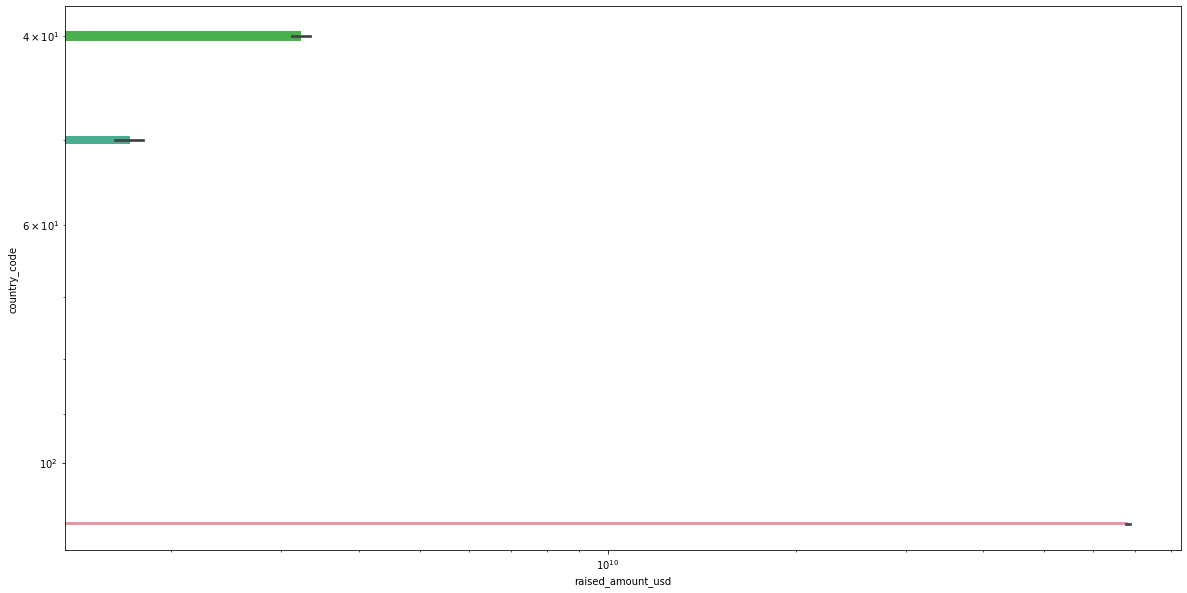

In [131]:
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
g=sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", width=.005, data=result, estimator=np.sum)
g.set_xscale('log')
g.set_yscale('log')
plt.show()